# DECISION TREE

1. Data Preparation:

In [119]:
import pandas as pd
df = pd.read_excel('heart_disease.xlsx', sheet_name=1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


2. Exploratory Data Analysis (EDA):

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [121]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [122]:
df.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs            bool
restecg      object
thalch        int64
exang        object
oldpeak     float64
slope        object
thal         object
num           int64
dtype: object

In [123]:
# checking for missing values

df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [124]:
# found 62 missing values in oldpeak column

median_old_peak = df['oldpeak'].median()
 #filling missing values with median
df.fillna({'oldpeak': median_old_peak}, inplace=True)


In [125]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

In [126]:
# checking for duplicate values
df.duplicated().sum()

1

In [127]:
# removing duplicate value

df = df.drop_duplicates()
df.duplicated().sum()

0

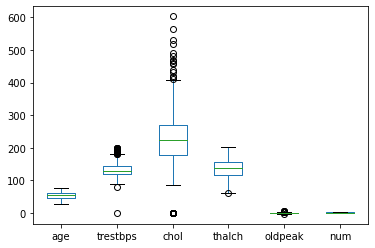

In [128]:
# checking for outliers
import matplotlib.pyplot as plt
df.plot(kind='box')
plt.show()

In [129]:
#found outliers. calculating IQR to replace
import numpy as np
def replace_outliers(series):
    if np.issubdtype(series.dtype, np.number):
        Q1 = series.quantile(0.25)
        Q3 = series.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        series[series < lower_bound] = series[series >= lower_bound].min()
        series[series > upper_bound] = series[series <= upper_bound].max()
    return series

df_cleaned = df.apply(replace_outliers, axis=0)

3. Feature Engineering:

In [131]:
df2= df_cleaned

In [132]:
#performing one-hot encoding for categorical columns
df_encoded = pd.get_dummies(df2, columns=['sex', 'cp', 'restecg', 'exang', 'slope', 'thal'])
df_encoded = df_encoded.astype(int)

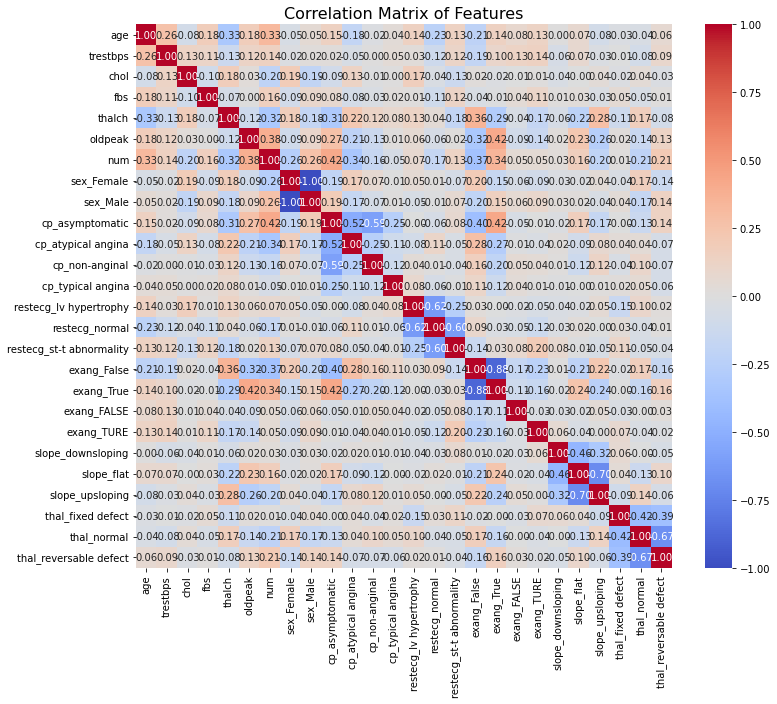

In [133]:
#calculating correlation matrix
import seaborn as sns
correlation_matrix = df_encoded.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features', fontsize=16)
plt.show()

In [134]:
df3 = df_encoded

In [135]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 907 entries, 0 to 907
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   age                       907 non-null    int32
 1   trestbps                  907 non-null    int32
 2   chol                      907 non-null    int32
 3   fbs                       907 non-null    int32
 4   thalch                    907 non-null    int32
 5   oldpeak                   907 non-null    int32
 6   num                       907 non-null    int32
 7   sex_Female                907 non-null    int32
 8   sex_Male                  907 non-null    int32
 9   cp_asymptomatic           907 non-null    int32
 10  cp_atypical angina        907 non-null    int32
 11  cp_non-anginal            907 non-null    int32
 12  cp_typical angina         907 non-null    int32
 13  restecg_lv hypertrophy    907 non-null    int32
 14  restecg_normal            907 non-null    

4. Decision Tree Classification:

In [136]:
from sklearn.model_selection import train_test_split
#splitting data into train test
x = df3.drop(columns=['num']) 
y = df3['num'] 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [137]:
print("Training set shape:", x_train.shape, y_train.shape)
print("Testing set shape:", x_test.shape, y_test.shape)

Training set shape: (725, 25) (725,)
Testing set shape: (182, 25) (182,)


In [138]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
#fitting the model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

#calculating accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5604395604395604


In [139]:
#evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, clf.predict_proba(x_test), average='macro', multi_class='ovr')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.5604395604395604
Precision: 0.5461145400228057
Recall: 0.5604395604395604
F1 Score: 0.552656965312052
ROC AUC Score: 0.6267962426386677


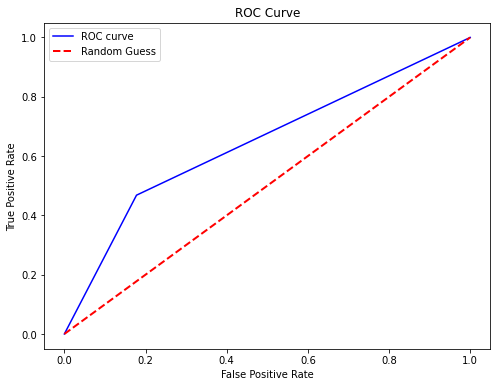

In [140]:
# plotting roc curve
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(x_test)[:, 1], pos_label=1)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue',label='ROC curve')
plt.plot([0 , 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='upper left')
plt.show()

5. Hyperparameter Tuning:

In [141]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy'] #defining the grid
}
dt = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy') # cv = cross validation k=5

grid_search.fit(x_train, y_train)

# printing the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

best_clf = grid_search.best_estimator_

# evaluating the best model on the testing set
y_pred = best_clf.predict(x_test)
after_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on Testing Set:", after_accuracy)

Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}
Accuracy on Testing Set: 0.5769230769230769


6. Model Evaluation and Analysis:

In [142]:
print("Before Hyperparameter Tuning:")
print("  Accuracy:", accuracy)
print("  Precision:", precision)
print("  Recall:", recall)
print("  F1 Score:", f1)
print("  ROC AUC Score:",roc_auc)
print("\nAfter Hyperparameter Tuning:")
print("  Accuracy on Testing Set:", after_accuracy)

Before Hyperparameter Tuning:
  Accuracy: 0.5604395604395604
  Precision: 0.5461145400228057
  Recall: 0.5604395604395604
  F1 Score: 0.552656965312052
  ROC AUC Score: 0.6267962426386677

After Hyperparameter Tuning:
  Accuracy on Testing Set: 0.5769230769230769


Insights

Accuracy improvement : The accuracy of the model improved from 56.04% before hyperparameter tuning to 57.69% after hyperparameter implementation.


Interview Questions:

1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

Max Depth:
Limits the maximum depth of the tree. Increasing this parameter may lead to a more complex model, which can capture more intricate patterns in the data

Min Samples Split:
Specifies the minimum number of samples required to split an internal node. 

Criterion:
Determines the function used to measure the quality of a split. Choosing the right criterion depends on the nature of the data and the problem at hand.

Max Features:
Controls the number of features to consider when looking for the best split. Limiting the number of features can help to reduce the model's complexity and improve its generalization performance

2. What is the difference between the Label encoding and One-hot encoding?

Label Encoding:
In label encoding.In a binary variable with categories "Male" and "Female," "Male" might be assigned the label 0 and "Female" might be assigned the label 1.
* one cons of label encoding is that if there is a multiple categories thn the model maybe biased towards variable with highest value 

One-hot Encoding:
In one-hot encoding, each category in a categorical variable is represented as a binary vector, where each element corresponds to one category. Only one element in the vector is "hot" (1), indicating the presence of that category, while the rest are "cold" (0)
* con with one hot encoding is that it consumes memory for every new column